# Activity target
Se declaran las librerías generales

In [40]:
from importlib import reload
import lib.main_func_p1
import lib.main_func_p2
import lib.main_func_p3
import lib.main_func_p4_CLF_models
from lib.main_func_p1 import path

import pandas as pd
import numpy as np
# save the models
import pickle

## Parte 1. Resumen de targets


In [12]:
resumen_target = pd.read_excel('data/_informes/5_Activity_type_summary.xlsx', index_col=0, engine='openpyxl')
resumen_target

C:\Users\caramirezs\anaconda3\envs\cramirez_ML\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,target_type,pref_name,organism,# Total ligands,# Active ligands,# Intermediate ligands,# Inactive ligands
accession,,,,,,,
P00533,SINGLE PROTEIN,Epidermal growth factor receptor erbB1,Homo sapiens,8808.0,2344.0,1639.0,4825.0
P56817,SINGLE PROTEIN,Beta-secretase 1,Homo sapiens,7816.0,5450.0,1393.0,973.0
P42336,SINGLE PROTEIN,PI3-kinase p110-alpha subunit,Homo sapiens,6316.0,1655.0,1824.0,2837.0
P22303,SINGLE PROTEIN,Acetylcholinesterase,Homo sapiens,5664.0,2450.0,1378.0,1836.0
P12931,SINGLE PROTEIN,Tyrosine-protein kinase SRC,Homo sapiens,4682.0,824.0,758.0,3100.0
P49841,SINGLE PROTEIN,Glycogen synthase kinase-3 beta,Homo sapiens,4375.0,746.0,886.0,2743.0
P27338,SINGLE PROTEIN,Monoamine oxidase B,Homo sapiens,4275.0,1606.0,1119.0,1550.0
P28482,SINGLE PROTEIN,MAP kinase ERK2,Homo sapiens,4021.0,2072.0,521.0,1428.0
P06276,SINGLE PROTEIN,Butyrylcholinesterase,Homo sapiens,3438.0,1227.0,876.0,1335.0


### Target
Escoger proteina (uniprot_ID) y el grupo al que pertenece

In [50]:
# uniprot_data = ['P49841', 'kinase']
uniprot_data = ['P22303', 'Non-IDG Family Targets']
uniprot_id = uniprot_data[0]
path_file = path(uniprot_id)

Declarar librerías y dependencias

In [51]:

reload(lib.main_func_p1)
from lib.main_func_p1 import get_info_target

In [53]:
try:
    with open(f'{path_file}_03_ligands_smiles_activity_type.csv') as f:
        print('Ya se cuenta con la información del target. No es necesario hacer este proceso')
        activity_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
except FileNotFoundError:
    activity_df = get_info_target(uniprot_data)

> Recuperando ADME y aplicando la regla de Lipinski (RoF)
>> # compuestos en data set:  5664
>> # compuestos que cumplen Lipinski's rule of five: 4719
>> # compuetos que NO cumplen Lipinski's rule of five: 945 (16.7%)
>>> Filtrando compuestos que cumplen Lipinski's rule of five
>>> SAVED: P22303_02_ligands_smiles_ADME_lipinski.csv
>>> SAVED: P22303_03_ligands_simles_activity_type.csv
>>>> Total compuestos (RoF): 4719
Active          1839
Inactive        1695
Intermediate    1185
Name: activity_type, dtype: int64
------------------------------------------------------------------


El dataset final solo tiene tres columnas: |molecule_chembl_id'| 'smiles'| 'activity_type'|
Se descartaron los compuestos que no cumplen la regla de los cinco.

In [54]:
activity_df.head()

,chembl_id_ligand,smiles,activity_type
0,CHEMBL4779999,Brc1ccc(-c2nnc(N3CCN(c4ccccn4)CC3)o2)cc1,Active
1,CHEMBL4519496,Brc1ccc(-c2nnn3c2C2c4ccccc4CCN2Cc2ccccc2-3)cc1,Active
2,CHEMBL4741398,Brc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1,Active
3,CHEMBL330004,Brc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1,Active
4,CHEMBL2375483,Brc1cccc(-c2nnc3sc(-c4ccoc4)nn23)c1,Active


In [55]:
# Comprobar que no hay smiles duplicados en el conjunto (debe dar false)
activity_df.duplicated(subset=['smiles']).value_counts()

False    4719
dtype: int64

## Parte 2. Análisis estadístico de los datos

Se declaran las librerias y dependencias
Se carga los data set para no volver a ejecutar la primera parte (tarda mucho tiempo la primera vez)

In [56]:
reload(lib.main_func_p2)
from lib.main_func_p2 import get_properties_stats, plot_radarplot

import matplotlib.pyplot as plt
import seaborn as sns

path_file = path(uniprot_id)
ADME_df = pd.read_csv(f'{path_file}_02_ligands_smiles_ADME_lipinski.csv')
NO_ADME_df = pd.read_csv(f'{path_file}_02_ligands_smiles_NO_ADME_lipinski.csv')
print('Archivo ADME_df cargado')
activity_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
print('Archivo SMILES + tipo_actividad cargado')

Archivo ADME_df cargado
Archivo SMILES + tipo_actividad cargado


In [57]:
ADME_df.head()

,chembl_id_ligand,smiles,MW,HBA,HBD,LogP,activity_type
0,CHEMBL4779999,Brc1ccc(-c2nnc(N3CCN(c4ccccn4)CC3)o2)cc1,385.053822,6,0,3.2207,Active
1,CHEMBL4519496,Brc1ccc(-c2nnn3c2C2c4ccccc4CCN2Cc2ccccc2-3)cc1,442.079309,4,0,5.1579,Active
2,CHEMBL4741398,Brc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1,344.088811,2,1,3.8132,Active
3,CHEMBL330004,Brc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1,398.099375,3,0,5.4351,Active
4,CHEMBL2375483,Brc1cccc(-c2nnc3sc(-c4ccoc4)nn23)c1,345.952394,6,0,3.8753,Active


### Estadística ADME
####

In [58]:
data_stats = get_properties_stats(ADME_df)
data_stats_NO = get_properties_stats(NO_ADME_df)
print('> Datos estadísticos de los compuestos filtrados por la regla de lipinski (cumplen)')
data_stats

> Datos estadísticos de los compuestos filtrados por la regla de lipinski (cumplen)


,mean,std
HBD,1.00,0.99
HBA,4.14,1.80
MW,361.72,89.96
LogP,3.76,1.49


In [59]:
print('> Datos estadísticos de los compuestos filtrados por la regla de lipinski (no cumplen)')
data_stats_NO

> Datos estadísticos de los compuestos filtrados por la regla de lipinski (no cumplen)


,mean,std
HBD,1.81,1.34
HBA,5.95,1.86
MW,597.29,84.44
LogP,7.21,1.59


> Resumen (gráfico) de las estadísticas (cumplen)


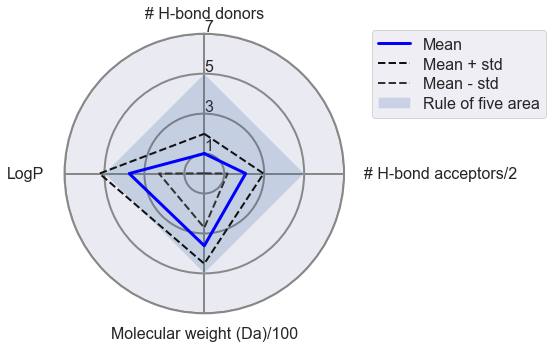

In [60]:
print('> Resumen (gráfico) de las estadísticas (cumplen)')
plot_radarplot(uniprot_id, data_stats, 'cumplen')

> Resumen (gráfico) de las estadísticas (no cumplen)


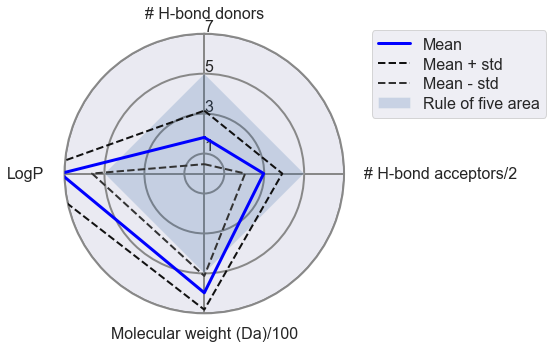

In [61]:
print('> Resumen (gráfico) de las estadísticas (no cumplen)')
plot_radarplot(uniprot_id, data_stats_NO, 'no_cumplen')

In [62]:
ADME_filtered_df = ADME_df[ADME_df['activity_type']!='Intermediate']
print(f'Filtrado de compuestos activos / inactivos: {len(ADME_filtered_df)}')

Filtrado de compuestos activos / inactivos: 3534


<Figure size 1440x1440 with 0 Axes>

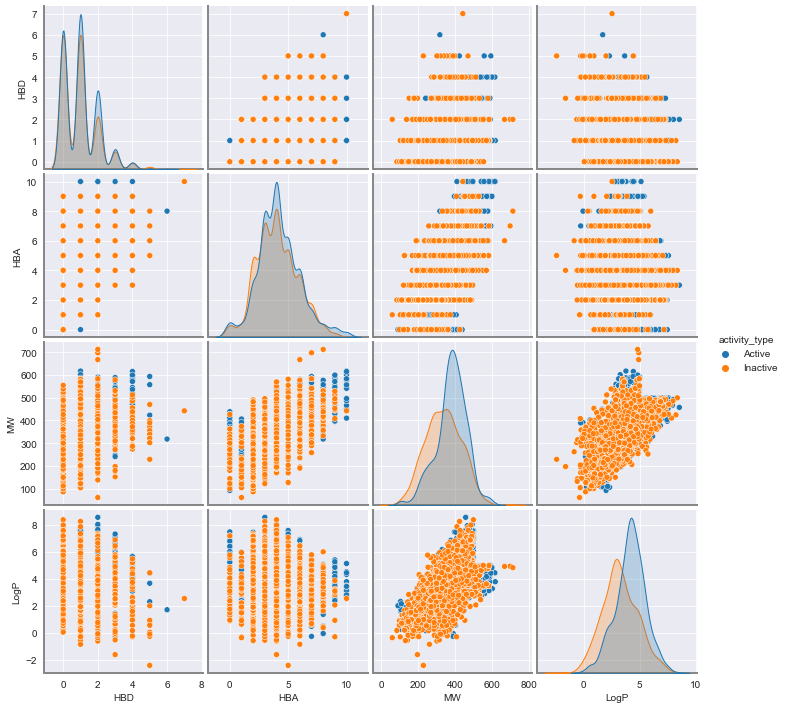

In [63]:
fig = plt.figure(figsize=(20, 20))
ax = sns.pairplot(data=ADME_filtered_df, vars=['HBD', 'HBA', 'MW', 'LogP'], hue='activity_type')
plt.savefig(f'{path_file}_AllinOne.png', bbox_inches='tight')
plt.show()
plt.close()

### Estadísticas tipo de actividad

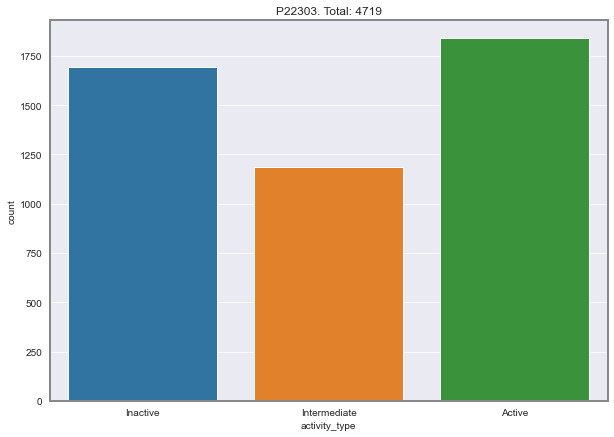

In [64]:
fig = plt.figure()
fig.set_size_inches(10,7)
ax = sns.countplot(x='activity_type', data=ADME_df, order=['Inactive', 'Intermediate', 'Active'])
ax.set_title(f'{uniprot_id}. Total: {len(ADME_df)}')
plt.savefig(f'{path_file}_activity_type.png', bbox_inches='tight')
plt.show()
plt.close()

## Parte 3. Carga de los fingerprint
Declarar librerias y dependencias
Carga de datasets para no volver a ejecutar la primera parte (tarda mucho tiempo la primera vez)

In [65]:
reload(lib.main_func_p3)
from lib.main_func_p3 import export_train_set_pickle

path_file = path(uniprot_id)
# Filtrado Activos / Inactivos
activity_filtered_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
activity_filtered_df = activity_filtered_df[activity_df['activity_type'] != 'Intermediate']

A partir del SMILE se encuentra la representación vectorial de la fingerprint. Hay una gran variedad de fingerprints, la siguiente lista tiene algunas de las más comunes.
La lista completa está en `main_func_p3.py`

In [66]:
print("""
maccs                   MACCS KEys              nBits = 167
morgan2_c               ECFP4                   nBits = 1024
morgan3_c               ECFP6                   nBits = 1024
topological_torsions_b  TORSION                 nBits = 2048
rdkit5_b                RDK5                    nBits = 1024
avalon_512_b            AVALON                  nBits = 512
""")


maccs                   MACCS KEys              nBits = 167
morgan2_c               ECFP4                   nBits = 1024
morgan3_c               ECFP6                   nBits = 1024
topological_torsions_b  TORSION                 nBits = 2048
rdkit5_b                RDK5                    nBits = 1024
avalon_512_b            AVALON                  nBits = 512



Se decide trabajar con la fingerprint `morgan2_c`, la siguiente función encuentra la fingerprint de los compuestos del dataset y cambia la columna activity_type por activity, siendo 0: inactive y 1: active.
Para no volver a realizar todo el proceso anterior, se puede guardar el data set en formato pickle con la información de la fingerprint y la clasificación.

La siguiente función encuentra las fingerprints seleccionadas (lista fp_list) de los compuestos del data set y cambia la columna activity_type por activity, siendo 0: inactive y 1: active.
Para no volver a realizar todo el proceso anterior, se puede guardar el data set en formato `pickle` con la información de las fingerprints y la clasificación

In [67]:
# fp_list = ['maccs', 'morgan2_c', 'morgan3_c', 'topological_torsions_b', 'rdkit5_b', 'avalon_512_b']
fp_list = ['morgan2_c']
try:
    with open(f'{path_file}_dataset') as f:
        print('El archivo ya está en la base. No es necesario hacer este proceso')
        fp_df = pd.read_pickle(f'{path_file}_dataset')
except FileNotFoundError:
    # Construct a molecule from a SMILES string
    fp_df = export_train_set_pickle(activity_filtered_df, fp_list)
    fp_df.to_pickle(f'{path_file}_dataset')
    print(f'>>> SAVED: {uniprot_id}_dataset, compounds: {len(fp_df)}')

>>> SAVED: P22303_dataset, compounds: 3534


Este es un ejemplo del conjunto de entrenamiento guardado

In [68]:
fp_df.head()

,chembl_id_ligand,morgan2_c,activity
0,CHEMBL4779999,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
1,CHEMBL4519496,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
2,CHEMBL4741398,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
3,CHEMBL330004,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,CHEMBL2375483,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0


## Parte 4. Módelo de clasificación Random Forest Classification
Declarar librerias y dependencias
Carga de archivo con la información de la fingerprints y la clasificación

In [69]:
# sklearn:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

In [70]:
reload(lib.main_func_p4_CLF_models)
from lib.main_func_p4_CLF_models import create_param_grid, plot_ROC_curve, model_clf, resample_set

path_file = path(uniprot_id)
fp_df_temp = pd.read_pickle(f'{path_file}_dataset')
fp_list = list(fp_df_temp.columns)[1:-1] # Reload finger print list
print(f'>>> LOAD: 05_{uniprot_id}_dataset')

>>> LOAD: 05_P22303_dataset


Resumen de la clasificación de la actividad:

In [71]:
print(fp_df_temp.activity.value_counts())
ratio = round(list(fp_df_temp.activity.value_counts())[0] / list(fp_df_temp.activity.value_counts())[1], 2)
print(f'Razón [{ratio}: 1]')

1.0    1839
0.0    1695
Name: activity, dtype: int64
Razón [1.08: 1]


El conjunto de datos de entrenamiento está desbalanceado

Para trabajar con conjuntos desbalanceados se puede:
1. Medir diferentes métricas de desempeño
2. Remuestreo del conjunto, submuestreo de la clase dominante
3. Penalizar el modelo

### Submuestreo clase dominante

La idea es escoger aleatoriamente n muestras de la clase dominante, donde n es el número de muestras de la otra clase, de esta manera ambas categorías tendrán el mismo número de muestras

In [72]:
# ratio = 0: no hace submuestro
fp_df = resample_set(fp_df_temp, ratio=0)
print('# compuestos: ', len(fp_df))
print(fp_df.activity.value_counts())
ratio = round(list(fp_df.activity.value_counts())[0] / list(fp_df.activity.value_counts())[1], 2)
print(f'Razón [{ratio}: 1.0]')

# compuestos:  3534
1.0    1839
0.0    1695
Name: activity, dtype: int64
Razón [1.08: 1.0]


### Random Forest Classifier
valores por defecto

In [73]:
seed = 1
param = {'max_features': 'auto', 'n_estimators': 2000, 'criterion': 'entropy', 'min_samples_leaf': 1, 'n_jobs': -1}
n_splits = 5
fp_name = 'morgan2_c'
# fp_name = 'avalon_512_b'

Rf_clf_overfit = RandomForestClassifier()
df_model_overfit, results_ROC_overfit = model_clf(Rf_clf_overfit, fp_df, fp_name, uniprot_id,
                                              params_dict=param, seed=seed, n_splits=n_splits)
# print(Rf_clf_tuned.get_params())
df_model_overfit

Results RandomForestClassifier: 
-------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       339
         1.0       0.92      0.90      0.91       368

    accuracy                           0.91       707
   macro avg       0.91      0.91      0.91       707
weighted avg       0.91      0.91      0.91       707



,Metric,Train,Test
0,AUC,0.999873,0.961624
1,accuracy,0.997878,0.909477
2,sensitivity (recall),0.997961,0.997961
3,specificity,0.997788,0.914454
4,precision,0.997961,0.91989
5,f1_score,0.997961,0.912329
6,confusion_matrix,"[[1353, 3], [3, 1468]]","[[310, 29], [35, 333]]"


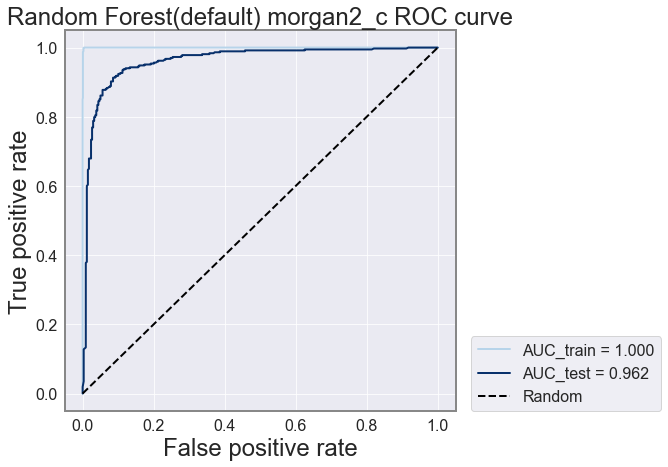

In [74]:
model_name = f'Random Forest(default) {fp_name}'
metrics_ROC_name = ['train', 'test']
plot_ROC_curve(results_ROC_overfit, metrics_ROC_name, model_name)

Es un caso de *overfiting*, ya que el AUC_train (área bajo la curva ROC del conjunto de entrenamiento) es 1.
Se puede deber a la cantidad de datos o a la cantidad de características.
Opciones:
1. Hacer el modelo más simple.
2. Ajustar los hyperparámetros
3. Reducir la dimensión de las características

El objetivo ahora es intentar optimizar el modelo cambiando los hiperparámetros

### Grilla de hiperparámetros Random Forest

Para encontrar el mejor modelo se hace una búsqueda de _hyper parámetros_. Se escoge la siguiente grilla, para un total de ~253400 opciones.
La búsqueda y optimización de los hiperparámetros se realiza fuera de este notebook para realizar múltiples pruebas en paralelo. El excel `results_grid_params_RFC` tiene los resultados.

### Construcción y verificación del modelo
Una vez escogidos los hypoer parámetros, se vuelve a ejecutar el modelo. Como se puede ver en las curvas ROC, se redujo el overfiting y las métricas tienen resultados positivos

In [152]:
print("""----------------------------------------------------------------------------------------------------------------------
-----------------------------------HIPER PARAMETROS-------------------------------------------------------------------
#>>> (03.23.2022): Buen desempeño, esta en el top de la mayoría de métricas. Presenta un poco de overfitting
{'n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 0.9,
'max_leaf_nodes': 180, 'oob_score': True, 'max_samples': None, 'criterion': 'gini'}

#>>> (03.23.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 1.0,
'max_leaf_nodes': 80, 'oob_score': True, 'max_samples': 0.7, 'criterion': 'gini'}

# >>> (03.2.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 0.8,
'max_leaf_nodes': 40, 'oob_score': True, 'max_samples': 0.8, 'criterion': 'gini'}

# >>> (03.2.2022): overfiting maccs - ratio:1.5 - n_splits:5
{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 1.0, 'max_leaf_nodes': 180, 'oob_score': False, 'max_samples': 0.9, 'criterion': 'entropy'}

# >>> (03.2.2022): overfiting maccs - ratio:1.75 - n_splits:5
{'n_estimators': 80, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 0.6, 'max_leaf_nodes': 160, 'oob_score': True, 'max_samples': nan, 'criterion': 'entropy'}
----------------------------------------------------------------------------------------------------------------------""")

----------------------------------------------------------------------------------------------------------------------
-----------------------------------HIPER PARAMETROS-------------------------------------------------------------------
#>>> (03.23.2022): Buen desempeño, esta en el top de la mayoría de métricas. Presenta un poco de overfitting
{'n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 0.9,
'max_leaf_nodes': 180, 'oob_score': True, 'max_samples': None, 'criterion': 'gini'}

#>>> (03.23.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 1.0,
'max_leaf_nodes': 80, 'oob_score': True, 'max_samples': 0.7, 'criterion': 'gini'}

# >>> (03.2.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 0.8,
'max_leaf_nodes': 40, 'oob_score': True, 'max_samples': 0.8, 'criterion': 'gini'}

# >>> (03.2.202

In [75]:
# >>> (03.2.2022): overfiting maccs - ratio:1.5 - n_splits:5
params_dict = {'n_estimators': 80, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 0.6, 'max_leaf_nodes': 160, 'oob_score': True, 'max_samples': None, 'criterion': 'entropy'}

Rf_clf_tuned = RandomForestClassifier(n_jobs=-1)
n_splits = 5
seed = 1
df_results_model_tuned, results_ROC_fp = model_clf(Rf_clf_tuned, fp_df, fp_name, uniprot_id,
                                              params_dict=params_dict, seed=seed, n_splits=n_splits)
# print(Rf_clf_tuned.get_params())
df_results_model_tuned

Results RandomForestClassifier: 
-------------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       339
         1.0       0.86      0.82      0.84       368

    accuracy                           0.84       707
   macro avg       0.84      0.84      0.84       707
weighted avg       0.84      0.84      0.84       707



,Metric,Train,Test
0,AUC,0.964977,0.92534
1,accuracy,0.903431,0.838755
2,sensitivity (recall),0.895989,0.895989
3,specificity,0.911504,0.861357
4,precision,0.916551,0.864943
5,f1_score,0.906153,0.840782
6,confusion_matrix,"[[1236, 120], [153, 1318]]","[[292, 47], [67, 301]]"


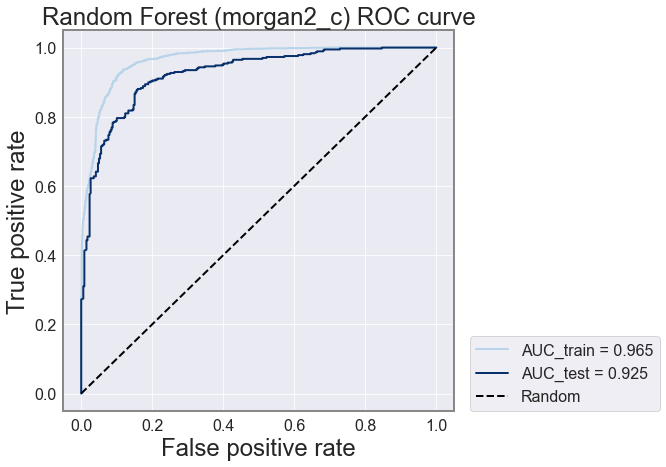

In [76]:
from lib.main_func_p4_CLF_models import plot_ROC_curve

model_name = f'Random Forest ({fp_name})'
metrics_ROC = results_ROC_fp
metrics_ROC_name = ['train', 'test']
plot_ROC_curve(metrics_ROC, metrics_ROC_name, model_name)

### Curva de calibración

In [77]:
# Cargar conjunto de prueba
with open(f'{path_file}_dataset_test', 'rb') as f:
    df_test_calibration = pickle.load(f)
x_test = df_test_calibration[fp_name].tolist()

# Calcular probabilidades del conjunto de prueba
prob_test_calibration = Rf_clf_tuned.predict_proba(x_test)[:,1]
prob_test_calibration = np.array(prob_test_calibration)
df_test_calibration['prediction_prob'] = prob_test_calibration
df_test_calibration.head()

,morgan2_c,activity,prediction_prob
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.223056
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.0,0.001042
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.877509
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.0,0.405957
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.927724


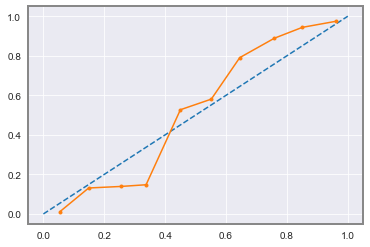

In [78]:
from matplotlib import pyplot
fop, mpv = calibration_curve(df_test_calibration['activity'], df_test_calibration['prediction_prob'], n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

### Guardar y exportar el modelo
El modelo elegido se va a exportar y a utilizar con un conjunto de decoys y el conjunto de test.

In [79]:
with open(f'{path_file}_RFclf_{fp_name}_model', 'wb') as f:
    pickle.dump(Rf_clf_tuned, f)
print(f'{uniprot_id}_RFclf_{fp_name}_model SAVED')

P22303_RFclf_morgan2_c_model SAVED


## Parte 5. Uso del modelo

### Carga del modelo
Cargar el modelo de Random Forest entrenado en el paso anterior.
Imprimir los hyper parámentros

In [80]:
fp_name = 'morgan2_c'
# fp_name = 'maccs'

with open(f'{path_file}_RFclf_{fp_name}_model', 'rb') as f:
    model_RFC = pickle.load(f)
print(f'{uniprot_id}_RFclf_{fp_name}_model LOAD')
print('Hyper parámetros : \n', model_RFC.get_params())

P22303_RFclf_morgan2_c_model LOAD
Hyper parámetros : 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.6, 'max_leaf_nodes': 160, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 80, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Carga del conjunto de prueba

Cargar el conjunto de prueba (el modelo no conoce los datos del conjunto de prueba).
Realizar un sub muestreo 1:1

In [81]:
with open(f'{path_file}_dataset_test', 'rb') as f:
    df_test = pickle.load(f)

# resample 1:1
df_test_active = df_test[df_test.activity == 1]
df_test_inactive = df_test[df_test.activity == 0]
n_sample = min(len(df_test_inactive), len(df_test_active))

if len(df_test_active) > len(df_test_inactive):
    df_test_active = df_test_active.sample(n_sample, random_state=seed)
elif len(df_test_inactive) > len(df_test_active):
    df_test_inactive = df_test_inactive.sample(n_sample, random_state=seed)
df_test = pd.concat([df_test_active, df_test_inactive], ignore_index=True).sample(frac=1)

df_test['type'] = 'test_inactive'
df_test.loc[df_test[df_test.activity == 1.0].index, 'type'] = 'test_active'
df_test.reset_index(drop=True, inplace=True)


df_test = df_test[['type', fp_name, 'activity']]
print(df_test.shape)
print(df_test.activity.value_counts())
df_test.head()


(678, 3)
0.0    339
1.0    339
Name: activity, dtype: int64


,type,morgan2_c,activity
0,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
1,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
2,test_active,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
3,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
4,test_inactive,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0


### Carga y preparación de los decoys
El archivo {uniprot_id}_all_smiles.ism contiene la lista de decoys del target.
Se carga el archivo y se convierte en un data set, por ahora solo contiene el SMILE.
Se escoge aleatoriamente una muestra con la misma cantidad de compuestos activos / inactivos (1:1:1)

In [82]:
df_decoys = pd.DataFrame(columns=['smiles'])
list_d = list()
with open(f'data/_decoys/{uniprot_id}_all_smiles.ism', 'rb') as f:
    decoys_line = f.readlines()
    for line in decoys_line[1:]: #la primera linea es header
        line = line.decode('UTF-8').split()
        list_d.append(line)
df_decoys = pd.DataFrame(list_d, columns=['smiles', 'id'])

print(f'Decoys iniciales: {df_decoys.shape}')
# OPC 1: Escoger una cantidad igual al conjunto de prueba
n = int(len(df_test)/2)
df_decoys = df_decoys.sample(n=n, ignore_index=True)

# OPC 2: Trabajar con un porcentaje
# df_decoys = df_decoys.sample(frac=0.5, ignore_index=True, random_state=seed)

print(f'Decoys conjunto muestra: {len(df_decoys)}')
df_decoys.head()

Decoys iniciales: (26250, 2)
Decoys conjunto muestra: 339


,smiles,id
0,C[C@H]1[C@@H](CC(=[N+]1c2ccc(cc2)OC)C)/C=N/N=c...,C38959074
1,c1ccnc(c1)/C(=C\c2ccc(cc2)OC(=O)c3cc(cc(c3)Cl)...,C12367836
2,Cc1ccc2=C[C@@H](C(=O)[NH+]=c2c1)[C@@H]([C@@H]3...,C39710711
3,Cc1ccccc1CC(=O)Nc2ccc(cc2)SC[C@H]3C(=O)[NH+]=c...,C63751680
4,CCOc1cc(cc(c1OCc2ccccc2Cl)Br)C[NH2+]C[C@@H]3CCCO3,C16688656


Encontrar el fingerprint de cada compuesto a partir del SMILE.

In [83]:
from lib.main_func_p3 import calculate_fp

def calculate_onefp(df, fp_name):
    from rdkit import Chem
    df['mol'] = df.smiles.map(lambda smile: Chem.MolFromSmiles(smile))
    df[fp_name] = df.mol.apply(calculate_fp, args=[fp_name])

calculate_onefp(df_decoys, fp_name)
df_decoys.drop_duplicates(subset=['smiles'], inplace=True)
df_decoys.reset_index(inplace=True, drop=True)
df_decoys = df_decoys.drop(['mol'], axis=1)
df_decoys = df_decoys.drop(['smiles'], axis=1)
df_decoys['type'] = 'decoy'
df_decoys = df_decoys[['type', fp_name]]
print(df_decoys.shape)

(339, 2)


### Predicciones

Con el modelo cargado, clasificar cada compuesto del conjunto decoys en activo: 1.0 o inactivo 0.0


In [84]:
x_decoy = df_decoys[fp_name].tolist()
pred_decoy = model_RFC.predict(x_decoy)
prediction_prob = model_RFC.predict_proba(x_decoy)[:,1]
prediction_prob = np.array(prediction_prob)
df_decoys['activity'] = 0.0
df_decoys['prediction'] = pred_decoy
df_decoys['prediction_prob'] = prediction_prob
df_decoys

,type,morgan2_c,activity,prediction,prediction_prob
0,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0,0.606260
1,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.125417
2,decoy,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.409660
3,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0,0.523133
4,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.385021
...,...,...,...,...,...
334,decoy,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.409227
335,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.291153
336,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0,0.559197
337,decoy,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.337338


Resumen de la clasificación

In [85]:
df_decoys.prediction.value_counts()

0.0    279
1.0     60
Name: prediction, dtype: int64

Clasificar los compuestos del conjunto de prueba. Como ya se conoce que tipo de actividad presentan, se organiza la información en varias columnas para posterior comparación.

In [86]:
x_test = df_test[fp_name].tolist()
pred_test = model_RFC.predict(x_test)
prediction_prob_test = model_RFC.predict_proba(x_test)[:,1]
prediction_prob_test = np.array(prediction_prob_test)
df_test['prediction'] = pred_test
df_test['prediction_prob'] = prediction_prob_test
df_test.head()

,type,morgan2_c,activity,prediction,prediction_prob
0,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.153020
1,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1.0,0.822825
2,test_active,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.0,0.487256
3,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.131606
4,test_inactive,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.097419


AUC score de la clasificación del conjunto de prueba

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       339
         1.0       0.85      0.81      0.83       339

    accuracy                           0.84       678
   macro avg       0.84      0.84      0.84       678
weighted avg       0.84      0.84      0.84       678



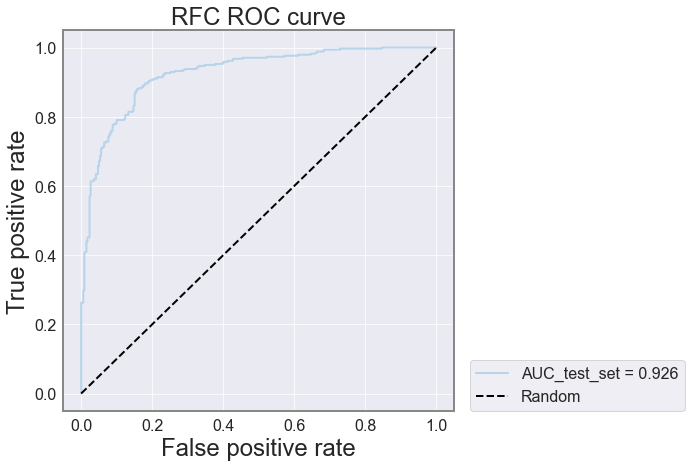

In [87]:
from lib.main_func_p4_CLF_models import plot_ROC_curve
from sklearn.metrics import roc_curve, auc, classification_report
fpr_test, tpr_test, _ = roc_curve(df_test['activity'].tolist(), prediction_prob_test)
auc_score_test = auc(fpr_test, tpr_test)
metrics_ROC = (fpr_test, tpr_test, auc_score_test)
print(classification_report(df_test['activity'].tolist(), pred_test))
plot_ROC_curve([metrics_ROC], ['test_set'], 'RFC')

Concatenar los dos conjuntos de datos para visualizar el rendimiento del algoritmo de clasificación

In [88]:
df = pd.concat([df_test, df_decoys], ignore_index=True)

print(df.type.value_counts())
df

test_inactive    339
test_active      339
decoy            339
Name: type, dtype: int64


,type,morgan2_c,activity,prediction,prediction_prob
0,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.153020
1,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1.0,0.822825
2,test_active,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.0,0.487256
3,test_inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.131606
4,test_inactive,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.097419
...,...,...,...,...,...
1012,decoy,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.409227
1013,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.291153
1014,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0,0.559197
1015,decoy,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.337338


<Figure size 720x720 with 0 Axes>

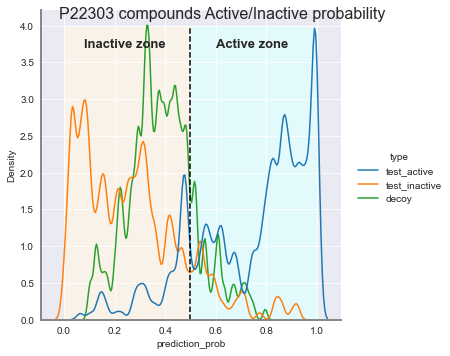

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(10,10)
ax = sns.displot(data=df, x='prediction_prob', hue="type", kind="kde", bw_adjust=.2, common_norm=False, hue_order=['test_active', 'test_inactive', 'decoy'])

plt.axvline(x=0.5, ymax=0.95, color='k', linestyle='--')
plt.axvspan(0, 0.5, ymax=0.95, facecolor='oldlace', alpha=0.8, zorder=-100)
plt.axvspan(0.5, 1, ymax=0.95, facecolor='lightcyan', alpha=0.8, zorder=-100)

plt.text(0.08, 0.88* plt.gca().get_ylim()[1], 'Inactive zone', fontsize=13, fontdict={"weight": "bold"})
plt.text(0.6, 0.88* plt.gca().get_ylim()[1], 'Active zone', fontsize=13, fontdict={"weight": "bold"})
plt.suptitle(f'{uniprot_id} compounds Active/Inactive probability',
                  fontsize=16, fontdict={"weight": "bold"})
plt.savefig(f'{path_file}_compounds_prob.png', dpi=300, bbox_inches='tight')
plt.show()

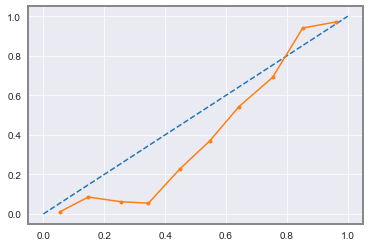

In [90]:
from matplotlib import pyplot
fop, mpv = calibration_curve(df['activity'], df['prediction_prob'], n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()